# Lifetime data

In this section, you'll learn more about the different categories of lifetime data. We will use ReLife code snippets to illustrate these concepts.

#### The basic situation

To begin, we will start with a basic situation to help you form a mental image of what we are interested in. I will first import some ReLife functionalities and run some code to create a nice plot that will guide us through this section. At this point, don't worry if you don't understand what these pieces of code do; you will learn more about them in the upcoming sections. For now, just focus on the plot!

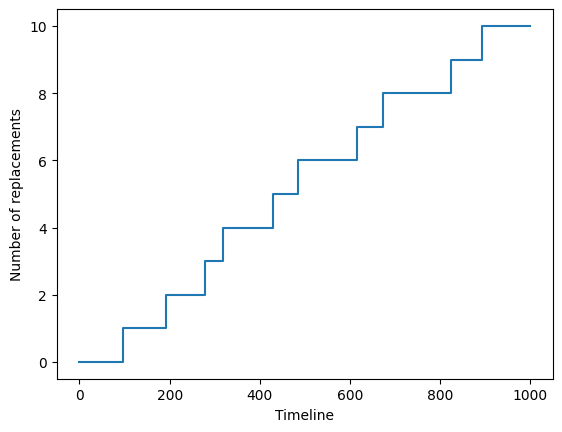

In [1]:
import matplotlib.pyplot as plt


from relife.models import Weibull
from relife.process import renewal_process

model = Weibull(3.7, 0.01)
process = renewal_process(model)

sample = process.sample(1, tf=1000, seed=1)

fig, ax = plt.subplots()
sample.plot.nb_events(ax=ax, label=None)
ax.set_xlabel("Timeline")
ax.set_ylabel("Number of replacements")
plt.show()
fig.savefig("lifetime_data_cell1.png")

What you see is a beautiful step plot that illustrates the evolution of a number over time. This number represents the count of how many times an asset has been replaced. At time zero (the first time the asset was installed), no replacements have occurred yet. We had to wait approximately 95 years to see the first replacement. From that moment on, the asset is immediately replaced by a new one. We wait again, and it is replaced once more. This process continues, with the asset being replaced repeatedly over time.

One important thing to notice is that the time between each replacement **is not constant; it varies!** For instance, after the replacement that occurred after approximately 230 years, we only waited about 40 years to replace it again. This raises a question: how can I know how much time I'll have to wait before the asset needs to be replaced? 

To answer that question, you need to collect real-world values of durations before the asset was replaced and conduct a statistical analysis. ReLife can assist you in performing this statistical analysis. Now, we will focus on how to collect data!

#### First data sample

Once again, we will use the previous plot to illustrate our point and add other pieces of code. For now, just focus on the results, and don't worry about the code itself, as it will be explained in the upcoming sections.

Imagine that in the real world, a very conscientious person has reported every moment when an asset was replaced and provided you with the graph above. From this graph, you can extract the durations between each replacement. The following ReLife command gives you these values:

In [2]:
durations, _, _, _ = process.failure_data_sample(1, tf=1000, seed=1)
print(durations)

[ 96.4439561   95.09262839  86.96249679  39.9442497  111.68409051
  55.51529933 129.10066294  58.24248363 150.7702303   69.45876827
 106.78513404]


#### The observation window

Something may have crossed your mind. In the real world, it is highly unlikely that someone started reporting these values from the very beginning. Consequently, if someone provides you with data, there is little chance that the duration values will be reported starting from 0. Similarly, we chose an upper time limit of 1000. We all understand that this upper time limit exists because we cannot collect data indefinitely. But does this not truncate the last duration? We collected 106, but is this the real value? In other words, is the duration complete? What if the actual duration is more than 106? This is certainly possible, as we collected durations up to 150!

Here, 0 and 1000 define what we call **the observation window**, and as we will see, this information is crucial for correctly interpreting the durations we collected. To illustrate this point, let's consider that in our example, the real observation window is (150, 750).

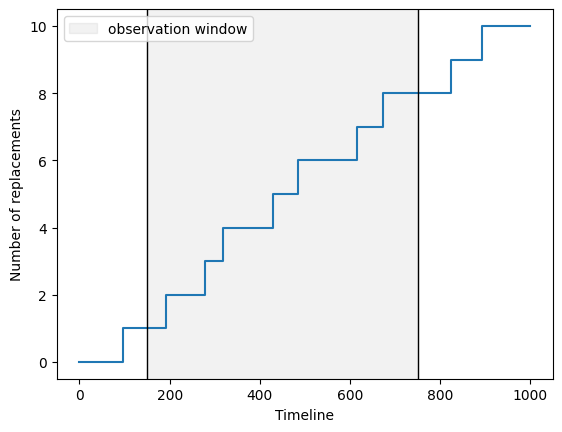

In [3]:
import numpy as np

fig, ax = plt.subplots()
timeline, nb_events = sample.nb_events()
sample.plot.nb_events(ax=ax, label=None)
ax.set_xlabel("Timeline")
ax.set_ylabel("Number of replacements")
ax.vlines(150, 0, 1, transform=ax.get_xaxis_transform(), colors="black", linewidth=1.)
ax.vlines(750, 0, 1, transform=ax.get_xaxis_transform(), colors="black", linewidth=1.)
ax.axvspan(150, 750, alpha=0.1, color='gray', label="observation window")
ax.legend()
plt.show()
fig.savefig("lifetime_data_cell3.png")

#### Complete vs. censored data

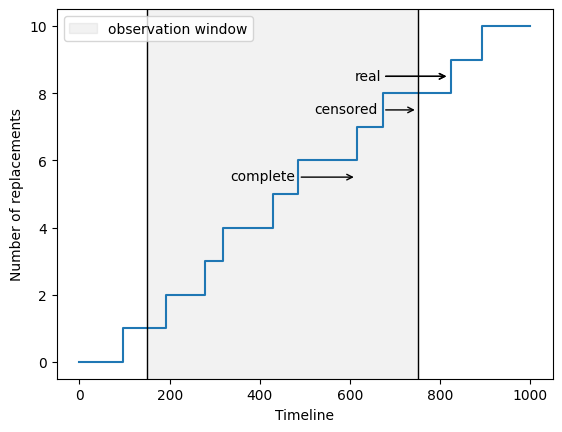

In [4]:
import numpy as np

fig, ax = plt.subplots()
timeline, nb_events = sample.nb_events()

sample.plot.nb_events(ax=ax, label=None)
ax.set_xlabel("Timeline")
ax.set_ylabel("Number of replacements")
ax.vlines(150, 0, 1, transform=ax.get_xaxis_transform(), colors="black", linewidth=1.)
ax.vlines(750, 0, 1, transform=ax.get_xaxis_transform(), colors="black", linewidth=1.)
ax.axvspan(150, 750, alpha=0.1, color='gray', label="observation window")
ax.annotate("", xytext=(672.98, 7.5), xy=(750, 7.5), arrowprops=dict(arrowstyle="->"), color="red")
ax.text(610, 8.4, "real")
ax.text(520, 7.4, "censored")
ax.text(335, 5.4, "complete")
ax.annotate("", xytext=(672.98, 8.5), xy=(820, 8.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(672.98, 8.5), xy=(820, 8.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(485.64, 5.5), xy=(614.74, 5.5), arrowprops=dict(arrowstyle="->"))
# ax.hlines(8.5, xmin=672.98, xmax=750, color="red", linewidth=1.5)
# ax.hlines(7.9, xmin=672.98, xmax=750, color="green", linewidth=1.5)
ax.legend()
plt.show()
fig.savefig("lifetime_data_cell4.png")

As you began to understand in the previous paragraph, the last duration is not **complete**. This is clearly illustrated in the graph above. This means that this value does not reflect the true duration. If you do not take this information into account, **you'll introduce errors** in your analysis. We refer to this situation as **right censoring**: the observed duration underestimates the actual duration.

#### Truncation

The above plot requires one more piece of information. Like the last duration, the first duration is affected by the lower bound of the observation window, but in this case, we have actually observed the event. Furthermore, the person who reported the values knew the age of the asset when he began collecting data. Therefore, he reported a duration until the event that is accurate because he truly observed the event. However, he also knew that the asset was a certain age at that time. This age defines a **left truncation**.

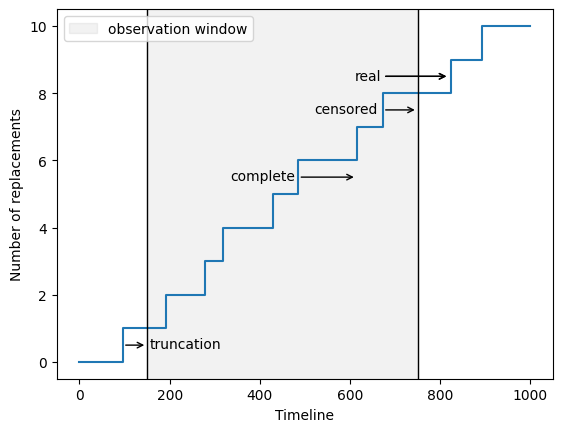

In [5]:
fig, ax = plt.subplots()
timeline, nb_events = sample.nb_events()

sample.plot.nb_events(ax=ax, label=None)
ax.set_xlabel("Timeline")
ax.set_ylabel("Number of replacements")
ax.vlines(150, 0, 1, transform=ax.get_xaxis_transform(), colors="black", linewidth=1.)
ax.vlines(750, 0, 1, transform=ax.get_xaxis_transform(), colors="black", linewidth=1.)
ax.axvspan(150, 750, alpha=0.1, color='gray', label="observation window")
ax.annotate("", xytext=(672.98, 7.5), xy=(750, 7.5), arrowprops=dict(arrowstyle="->"), color="red")
ax.text(610, 8.4, "real")
ax.text(520, 7.4, "censored")
ax.text(335, 5.4, "complete")
ax.text(155, 0.4, "truncation")
ax.annotate("", xytext=(672.98, 8.5), xy=(820, 8.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(672.98, 8.5), xy=(820, 8.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(485.64, 5.5), xy=(614.74, 5.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(96.44, 0.5), xy=(150, 0.5), arrowprops=dict(arrowstyle="->"))
# ax.hlines(8.5, xmin=672.98, xmax=750, color="red", linewidth=1.5)
# ax.hlines(7.9, xmin=672.98, xmax=750, color="green", linewidth=1.5)
ax.legend()
plt.show()
fig.savefig("lifetime_data_cell5.png")

The value of the truncation must also be collected, as it provides crucial information for estimating the probability of replacement after a certain time. You can agree that a brand new asset and an asset that is already 50 years old do not have the same probability of being replaced, as the former is younger than the latter. Intuitively, what you are doing is a **conditional probability computation**: you adjust the probability of the asset being replaced based on its current age.

#### Is it really important ?

Oh I see, you're not really convinced that those details matter. You argue that, maybe, if we have enough complete values, the errors will be negligeable. That's not true, it's a false intuition. I'll try to illustrate that.

Let's consider two scenarios. In the first, you did what you thought and you stated that all values within the observation window are complete. In the second scenario, you took care of what you read previously.

Now you conduct two statistical analysis. Remember, we want to know how much time we have to wait before the asset needs to be replaced. I need to be more precise about what we have called "statistical analysis". More precisely, here you actually want to estimate the underlying probability distribution of the asset lifetime. If you know this distribution, you can estimate the chance for the asset to be replaced over the time. As I said, ReLife can do that. You'll learn more about this in the next section 

#### Summing up

#### Other observation biases and truncations